In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [18]:
# Carregando os dados

data = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding = 'utf-16')
data.columns = ['happy','cityServices','costHousing','publicSchool','trustPolice','cleanStreets','socialEvents']
data

,happy,cityServices,costHousing,publicSchool,trustPolice,cleanStreets,socialEvents
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [22]:
# Estatisticas básicas do dataset

data.describe()

,happy,cityServices,costHousing,publicSchool,trustPolice,cleanStreets,socialEvents
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
# Examinando a correlação entre as variáveis

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,happy,cityServices,costHousing,publicSchool,trustPolice,cleanStreets,socialEvents
happy,1,0.31,0.019,0.16,0.11,0.21,0.22
cityServices,0.31,1,0.093,0.3,0.1,0.4,0.42
costHousing,0.019,0.093,1,0.18,0.11,-0.0021,0.025
publicSchool,0.16,0.3,0.18,1,0.3,0.33,0.21
trustPolice,0.11,0.1,0.11,0.3,1,0.27,0.2
cleanStreets,0.21,0.4,-0.0021,0.33,0.27,1,0.31
socialEvents,0.22,0.42,0.025,0.21,0.2,0.31,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81a69fe2e8>,
      dtype=object)

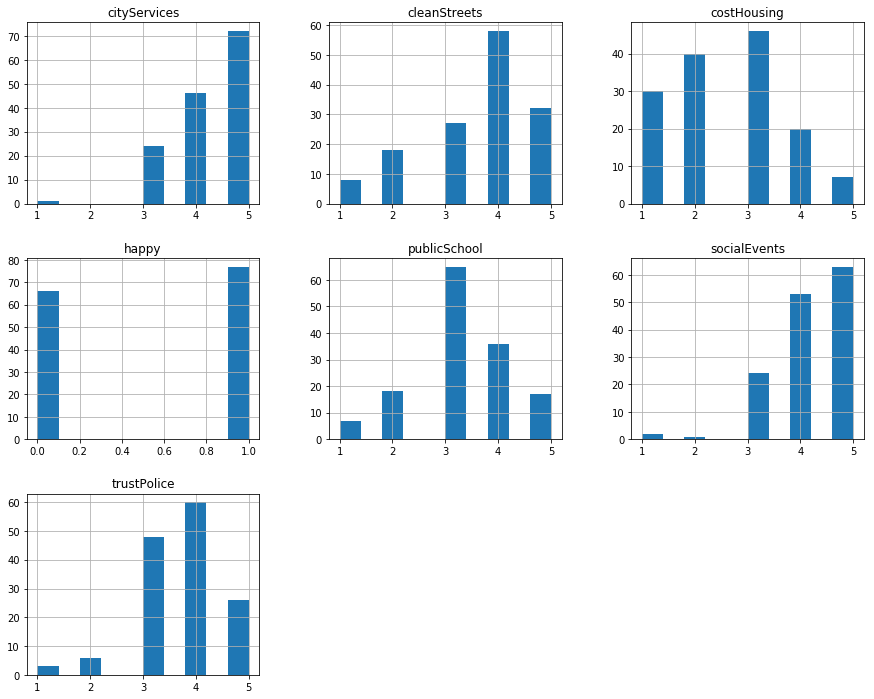

In [25]:
# Distribuição dos dados

data.hist(figsize=(15,12))

In [78]:
# Dividindo o dataset em conjunto treino e teste para o modelo

from sklearn.model_selection import train_test_split

train,test= train_test_split(data,train_size = 0.7, random_state = 2, shuffle = True)

features = list(data.columns[1:])
train_X = train[features]
train_Y = train['happy']

test_X = test[features]
test_Y = test['happy']


/home/rodolfo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [79]:
# Construindo o modelo

import statsmodels.formula.api as sm

model = sm.Logit(train_Y, train_X)
 
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.674301
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  happy   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 May 2019   Pseudo R-squ.:                 0.02267
Time:                        22:08:31   Log-Likelihood:                -67.430
converged:                       True   LL-Null:                       -68.994
                                        LLR p-value:                    0.6802
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cityServices     0.1713      0.251      0.681      0.496      -0.321       0.664
costHousing     -0.2470      0.198     -1.245      0.213      -0.636       0.142
publicSchool     0.0328      0.244      0.134      0.893      -0.445       0.511
trustPolice      0.0022      0.229      0.009      0.992      -0.447       0.451
cleanStreets     0.0830      0.212      0.391      0.696      -0.333       0.499
socialEvents    -0.0626      0.237     -0.264      0.792      -0.528       0.403
================================================================================
"""

In [80]:
# Validando
test['prediction_prob'] = result.predict(test_X)
test['prediction'] = [0 if x <= 0.6 else 1 for x in test['prediction_prob']]
test

/home/rodolfo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rodolfo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,happy,cityServices,costHousing,publicSchool,trustPolice,cleanStreets,socialEvents,prediction_prob,prediction
97,0,3,3,1,3,2,3,0.447753,0
119,0,4,1,3,2,4,4,0.650723,1
48,1,5,3,4,4,4,5,0.568077,0
54,1,5,1,3,3,4,4,0.689046,1
101,1,5,5,3,4,4,5,0.437154,0
3,0,5,4,3,3,3,5,0.477285,0
109,0,3,3,2,4,4,4,0.482148,0
77,0,4,5,5,5,1,3,0.382256,0
133,1,5,1,5,5,5,5,0.708047,1
2,1,5,3,3,3,3,5,0.538934,0


Confusion matrix, without normalization
[[10 10]
 [16  7]]


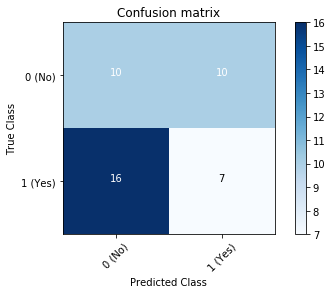

In [87]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from support_functions import calculate_accuracy, plot_confusion_matrix


class_labels = list(test['prediction'])
model_cm = confusion_matrix(y_true=test['happy'] , y_pred= test['prediction'])

plt.figure()
plot_confusion_matrix(model_cm, classes=['0 (No)','1 (Yes)'])
plt.show();

In [83]:
model_score = calculate_accuracy(test['prediction'], test['happy'])
model_score

0.3953488372093023

In [86]:
test[(test['prediction'] == 1) & (test['happy'] == 1) ]

,happy,cityServices,costHousing,publicSchool,trustPolice,cleanStreets,socialEvents,prediction_prob,prediction
54,1,5,1,3,3,4,4,0.689046,1
133,1,5,1,5,5,5,5,0.708047,1
24,1,5,1,2,5,2,4,0.645935,1
12,1,5,2,4,5,5,5,0.647066,1
99,1,5,1,3,4,5,5,0.693852,1
118,1,5,1,4,3,5,5,0.700315,1
65,1,5,2,4,4,5,5,0.646569,1
